In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [5]:
df = pd.read_csv('./data/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### 어떤 사람이 우리 은행에 금융상품에 가입확률이 높은지

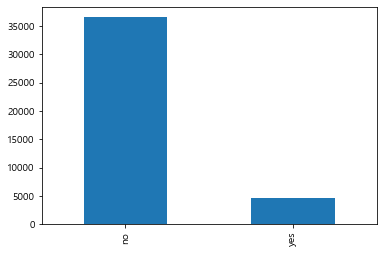

In [139]:
df['y'].value_counts().plot(kind='bar')

##### 나이별 분석

In [15]:
df1 = df[df.y=='yes']
df2 = df[df.y=='no']

In [82]:
age_dict = {}
for i in sorted(df.age.unique()):
    try :
        rate = df1.age.value_counts()[i] / df2.age.value_counts()[i]
        age_dict[i] = rate
    except :
        continue

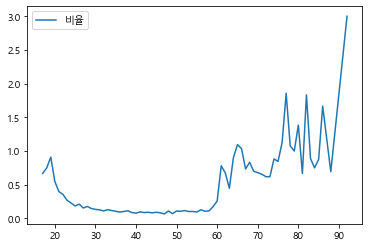

In [78]:
pd.DataFrame(age_dict, index = ['비율']).T.plot()

In [96]:
age_dict = {}
for i in sorted(df.age.unique()) :
    try :
        rate = df1.age.value_counts()[i] / df2.age.value_counts()[i]
        if (df1.age.value_counts()[i] < 3) | (df2.age.value_counts()[i] < 3):
            continue
        else :
            age_dict[i] = rate
    except :
        continue
        
age_dict

{18: 0.75,
 19: 0.9090909090909091,
 20: 0.5476190476190477,
 21: 0.3972602739726027,
 22: 0.3564356435643564,
 23: 0.2696629213483146,
 24: 0.22811671087533156,
 25: 0.18415841584158416,
 26: 0.21180555555555555,
 27: 0.1546811397557666,
 28: 0.1776470588235294,
 29: 0.1468034727703236,
 30: 0.1335978835978836,
 31: 0.12738853503184713,
 32: 0.11070998796630566,
 33: 0.12939001848428835,
 34: 0.11787315823190263,
 35: 0.10489949748743718,
 36: 0.09471094710947109,
 37: 0.10239162929745889,
 38: 0.11313291139240507,
 39: 0.08649468892261002,
 40: 0.07799442896935933,
 41: 0.09699570815450644,
 42: 0.08658420551855375,
 43: 0.09100310237849017,
 44: 0.08244111349036402,
 45: 0.09099901088031652,
 46: 0.08307045215562565,
 47: 0.06666666666666667,
 48: 0.10997732426303855,
 49: 0.07015306122448979,
 50: 0.11040609137055837,
 51: 0.10557184750733138,
 52: 0.11604584527220631,
 53: 0.10225563909774436,
 54: 0.1032258064516129,
 55: 0.0945945945945946,
 56: 0.1282051282051282,
 57: 0.106164

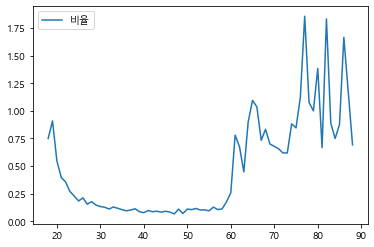

In [103]:
pd.DataFrame(age_dict, index = ['비율']).T.plot()  # 나이별 가입와 비가입자의 비율 (가입자 혹은 비가입자가 3인 나이는 제외)

In [102]:
df1.age.value_counts()[:10].index

Int64Index([31, 33, 30, 29, 32, 34, 35, 36, 28, 38], dtype='int64')

##### 직업군에서 금융상품가입 비율을 비교

In [106]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

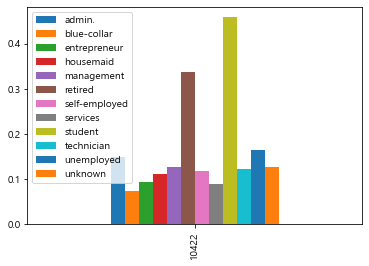

In [125]:
job_dict = {}
for i in df.job.value_counts():
    job_dict[i] = df1.job.value_counts() / df2.job.value_counts()
    
pd.DataFrame(job_dict).T.head(1).plot(kind='bar')

##### 자가 소유여부

In [134]:
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

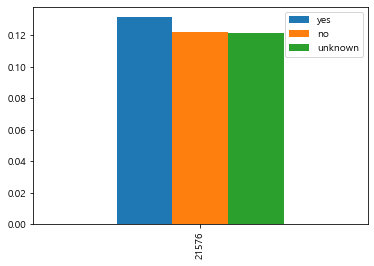

In [138]:
housing_dict = {}
for i in df.housing.value_counts():
    housing_dict[i] = df1.housing.value_counts() / df2.housing.value_counts()
    
pd.DataFrame(housing_dict).T.head(1).plot(kind='bar')